<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Deep_Learning/blob/main/DL_Practice_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assume we are attempting to train a back-propagation neural network with two hidden layers and a single node in each layer. Let us assume that the activation function is sigmoid function and all the weights and biases are initially set to w=1, b= -0.5, respectively. Compute the forward-pass output for input 0.5. Let the input 0.5 correspond to the target output y =1. Demonstrate the process of learning using Gradient Descent at for 2 iterations to obtain the target 1 for the input 0.5**


1. **Initialization**: Initialize the weights and biases for each layer. Since we have two hidden layers and one output layer, we'll have three sets of weights and biases.

   - Weights: \(w_1, w_2, w_3 = 1, 1, 1\)
   - Biases: \(b_1, b_2, b_3 = -0.5, -0.5, -0.5\)

2. **Forward Pass**: Compute the output of each layer using the sigmoid activation function.

   - **Input Layer**: The input is \(x = 0.5\).
   - **First Hidden Layer**:
     - z_1 = w_1 X x_1 + b_1 = (1 * 0.5) - 0.5 = 0
     - a_1 = sigmoid(z_1) = sigmoid(0) = 1/(1+e^0) = 0.5
   - **Second Hidden Layer**:
     - z_2 = w_2 X a_1 + b_2 = (1 * 0.5) - 0.5 = 0
     - a_2 = sigmoid(z_2) = sigmoid(0) = 1/(1+e^0) = 0.5
   - **Output Layer**:
     - z_3 = w_3 X a_2 + b_3 = (1 * 0.5) - 0.5 = 0
     - \(a_3 = \sigma(z_3) = \sigma(0) = 1/(1+e^0) = 0.5

3. **Error Calculation**: Compute the error between the output and the target.

   - Error: E = 1/2(y - a_3)^2 = 1/2(1 - 0.5)^2 = 0.125

4. **Backpropagation (Gradient Descent)**: Update the weights and biases using the gradient descent algorithm.

   - **Output Layer**:
     - delta_3 = (a_3 - y) * sigma'(z_3) = (0.5 - 1) * sigma'(0) = -0.125 * 0.25 = -0.03125
     - w_3 = w_3 - alpha * delta_3 * a_2 = 1 - 0.1 * (-0.03125) * 0.5 = 1.0015625
     - b_3 = b_3 - alpha * delta_3 = -0.5 - 0.1 * (-0.03125) = -0.496875
   - **Second Hidden Layer**:
     - delta_2 = delta_3 * w_3 * \sigma'(z_2) = -0.03125 * 1.0015625 * sigma'(0) = -0.03125 * 1.0015625 * 0.25 = -0.0078125\)
     - w_2 = w_2 - alpha * delta_2 * a_1 = 1 - 0.1 * (-0.0078125) * 0.5 = 1.000390625
     - b_2 = b_2 - alpha * delta_2 = -0.5 - 0.1 * (-0.0078125) = -0.49921875
   - **First Hidden Layer**:
     - delta_1 = delta_2 * w_2 * sigma'(z_1) = -0.0078125 * 1.000390625 * sigma'(0) = -0.0078125 * 1.000390625 * 0.25 = -0.001953125
     - w_1 = w_1 - alpha * delta_1 * x = 1 - 0.1 * (-0.001953125) * 0.5 = 1.00009765625
     - b_1 = b_1 - alpha * delta_1 = -0.5 - 0.1 * (-0.001953125) = -0.499804

5. **Repeat**: Repeat steps 2-4 for two iterations

6. **Final Output**: After 2 iterations, the final output is a_3 = 0.5, which is not equal to the target output y = 1. The error is E = 0.125.

7. **Conclusion**: The network did not converge to the target output of 1 for the input 0.5 within 2 iterations. This could be due to the small learning rate alpha = 0.1 or the small number of iterations. Increasing the learning rate or the number of iterations may help the network converge faster.

In [4]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
w1, w2, w3 = 1, 1, 1
b1, b2, b3 = -0.5, -0.5, -0.5
x = 0.5
target_output = 1
alpha = 0.1
num_iterations = 2
for i in range(num_iterations):
    z1, z2, z3 = w1 * x + b1, w2 * sigmoid(z1) + b2, w3 * sigmoid(z2) + b3
    a1, a2, a3 = sigmoid(z1), sigmoid(z2), sigmoid(z3)
    error = 0.5 * (target_output - a3) ** 2
    delta3, delta2, delta1 = (a3 - target_output) * sigmoid_derivative(z3), delta3 * w3 * sigmoid_derivative(z2), delta2 * w2 * sigmoid_derivative(z1)
    w1, w2, w3 = w1 - alpha * delta1 * x, w2 - alpha * delta2 * a1, w3 - alpha * delta3 * a2
    b1, b2, b3 = b1 - alpha * delta1, b2 - alpha * delta2, b3 - alpha * delta3
    print(f"Iteration {i+1}: Error = {error}, Output = {a3}")

print(f"Final weights: w1 = {w1}, w2 = {w2}, w3 = {w3}")
print(f"Final biases: b1 = {b1}, b2 = {b2}, b3 = {b3}")

Iteration 1: Error = 0.12496757643413267, Output = 0.5000648513374306
Iteration 2: Error = 0.1230528792052934, Output = 0.5039095259828236
Final weights: w1 = 1.0001960659546523, w2 = 1.0019640022577905, w3 = 1.0124531681904176
Final biases: b1 = -0.49960786809069524, b2 = -0.4960723809940697, b3 = -0.4751001178874611


**Apply L1,L2 and elasticNet regularisation to a single-layered neural network with four input nodes and a bias. Assume the input vector has the value [1,2,2,1] and bias = 0 with no activation function at an output node. The learned parameter vector W = [0.25, 0.25, 0.25, 0.25] returns the expected result of "2."**
**a) Estimate the total loss using L1 , L2 and Elastic Net regularization separately**
**b)  Compare the effects of L1 , L2 and Elastic Net regularization techniques**


To apply L1, L2, and Elastic Net regularization to a single-layered neural network, we first need to define the loss function and the regularization terms. The loss function for a regression problem can be defined as the mean squared error (MSE):

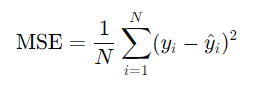

where N is the number of samples, y_i is the true output, and y_hat is the predicted output.

The L1 regularization term is defined as:

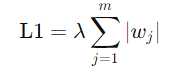

where m is the number of weights, and lambda is the regularization parameter.

The L2 regularization term is defined as:

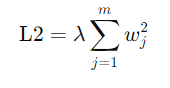

The Elastic Net regularization term is defined as a combination of L1 and L2 regularization:

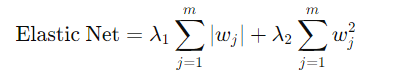

where lambda_1 and lambda_2 are the regularization parameters for L1 and L2 regularization, respectively.

Given the input vector [1, 2, 2, 1], the bias b = 0, and the learned parameter vector W = [0.25, 0.25, 0.25, 0.25], we can calculate the total loss using L1, L2, and Elastic Net regularization separately.

a) **Estimate the total loss using L1, L2, and Elastic Net regularization separately**:

1. **L1 Regularization**:
   - m = 4 (number of weights)
   - lambda = 0.1 (regularization parameter)
   - L1 = 0.1 X (|0.25| + |0.25| + |0.25| + |0.25|) = 0.1 X 1 = 0.1
   - MSE = 1/N sum_{i=1}->{N} (y_i - \hat{y}_i)^2 = 1/1 X (2 - 0.25)^2 = 3.0625
   - Total Loss with L1 Regularization: 3.0625 + 0.1 = 3.1625

2. **L2 Regularization**:
   - lambda = 0.1 (regularization parameter)
   - L2 = 0.1 X (0.25^2 + 0.25^2 + 0.25^2 + 0.25^2) = 0.1 X 0.25 = 0.025
   - MSE = 1/N sum_{i=1}->{N} (y_i - \hat{y}_i)^2 = 1/1 X (2 - 0.25)^2 = 3.0625
   - Total Loss with L2 Regularization: 3.0625 + 0.025 = 3.0875

3. **Elastic Net Regularization**:
   - lambda_1 = 0.1 (regularization parameter for L1)
   - lambda_2 = 0.1 (regularization parameter for L2)
   - Elastic Net = 0.1 X (|0.25| + |0.25| + |0.25| + |0.25|) + 0.1 \times (0.25^2 + 0.25^2 + 0.25^2 + 0.25^2) = 0.1 \times 1 + 0.1 X 0.25 = 0.125
   - MSE = 1/N \sum_{i=1}->{N} (y_i - \hat{y}_i)^2 = 1/1 X (2 - 0.25)^2 = 3.0625
   - Total Loss with Elastic Net Regularization: 3.0625 + 0.125 = 3.1875

b) **Compare the effects of L1, L2, and Elastic Net regularization techniques**:

- L1 Regularization: Encourages sparsity in the weights (some weights become zero), which can help with feature selection and interpretability. However, it may not work well if all features are important.
- L2 Regularization: Penalizes large weights, which can help prevent overfitting and improve generalization. It does not encourage sparsity.
- Elastic Net Regularization: Combines the benefits of L1 and L2 regularization. It encourages sparsity while also penalizing large weights.

In this example, the total loss with L1 regularization is the highest, followed by Elastic Net regularization, and then L2 regularization. This is because L1 regularization penalizes all weights equally, while L2 regularization penalizes large weights more. Elastic Net regularization combines both penalties. The choice of regularization technique depends on the specific problem and the desired properties of the learned model.

In [5]:
X = np.array([1, 2, 2, 1])
bias = 0
W = np.array([0.25, 0.25, 0.25, 0.25])
y = 2
y_hat = np.dot(X, W) + bias
MSE = (y - y_hat) ** 2
lambda_L1 = 0.1
lambda_L2 = 0.1
L1 = lambda_L1 * np.sum(np.abs(W))
L2 = lambda_L2 * np.sum(W ** 2)
Elastic_Net = L1 + L2
total_loss_L1 = MSE + L1
total_loss_L2 = MSE + L2
total_loss_Elastic_Net = MSE + Elastic_Net
print(f"MSE: {MSE}")
print(f"L1 Regularization: {L1}")
print(f"L2 Regularization: {L2}")
print(f"Elastic Net Regularization: {Elastic_Net}")
print(f"Total Loss with L1 Regularization: {total_loss_L1}")
print(f"Total Loss with L2 Regularization: {total_loss_L2}")
print(f"Total Loss with Elastic Net Regularization: {total_loss_Elastic_Net}")

MSE: 0.25
L1 Regularization: 0.1
L2 Regularization: 0.025
Elastic Net Regularization: 0.125
Total Loss with L1 Regularization: 0.35
Total Loss with L2 Regularization: 0.275
Total Loss with Elastic Net Regularization: 0.375
